# 2. Знакомство с новыми данными: данные о квартирах от Сбера

В этом модуле мы с вами будем работать с данными с самого настоящего соревнования на платформе Kaggle, инициатором которого стал Сбер. Соревнование проводилось в 2017 году, его призовой фонд составил 25 000 $. Требования Сбера состояли в построении модели, которая бы прогнозировала цены на жильё в Москве, опираясь на параметры самого жилья, а также состояние экономики и финансового сектора в стране.

Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (train.csv). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (macro.csv). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.

Скачать набор данных в формате csv (разделитель — ',') можно [здесь](https://lms.skillfactory.ru/assets/courseware/v1/fbb2e41c55afd1333f7f87e91e904e9f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/sber_data.zip) (csv-файл находится в zip-архиве — распакуйте архив, прежде чем продолжать работу!)

Он содержит информацию о 61 признаке. Их значение мы будем объяснять в процессе работы с данными.

Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными, numpy для математических преобразований, matplotlib и seaborn для визуализации):



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Прочитаем наши данные и выведем первые пять строк таблицы с помощью head(), чтобы убедиться в том, что всё подгрузилось верно:

In [2]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


Дополнительно посмотрим на последние пять строк таблицы с помощью tail():

In [3]:
sber_data.tail()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


Давайте проведём небольшой разведывательный анализ, чтобы понять, с чем мы работаем ↓

### Задание 2.1
Чему равно число строк в таблице?

In [4]:
print(f'Ответ: {sber_data.shape[0]}')

Ответ: 30471


### Задание 2.2
Сколько районов Москвы и Московской области представлено в данных?

In [9]:
print(f"Ответ: {sber_data['sub_area'].nunique()}")

Ответ: 146


### Задание 2.3
Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.

Присмотритесь к нему — не кажется ли оно вам странным? Мы к нему ещё вернемся :)

In [11]:
print(f"Ответ: {sber_data['price_doc'].max()}")

Ответ: 111111112


Примечание: Действительно странно. Видимо одна единица была напечатана по ошибке

### Задание 2.4
Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень ценится на рынке меньше всего?

Введите название этой категории без кавычек.

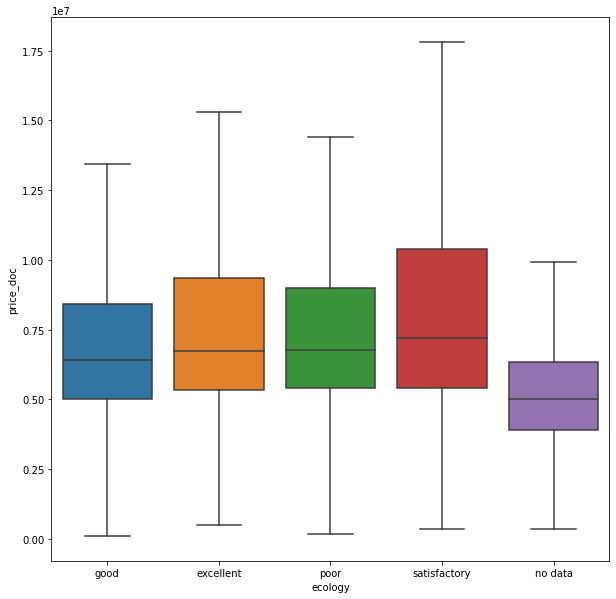

In [42]:
fig, ax = plt.subplots (figsize=(10, 10))
sns.boxplot(data=sber_data, x='ecology',
            y='price_doc', ax=ax, showfliers=False);

Ответ: no data

### Задание 2.5

Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km). Выберите все верные утверждения.

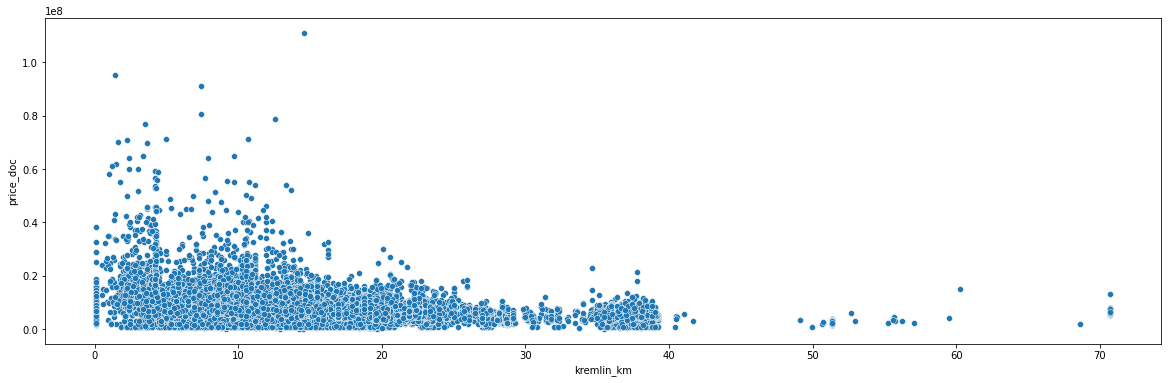

In [40]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.scatterplot(data=sber_data, x='kremlin_km', y='price_doc', ax=ax);

- A С увеличением расстояния от центра города цена растёт.
- B Большинство наблюдений находятся на расстоянии до 40 км от центра Москвы.
- C С увеличением расстояния от центра города цена падает.
- D Большинство наблюдений находятся на расстоянии более 40 км от центра Москвы.

верно

Ответ

Верно:

Вариант B. Из отметок на оси абсцисс видно, что большая часть наблюдений (точек) находится в интервале от 0 до 40 км, далее частота резко падает.

Вариант C. Из построенного графика видно, что с ростом расстояния до центра города постепенно уменьшается значение стоимости квартир.